In [1]:
import pandas as pd

file_path = "C:/Users/mlawal/Downloads/Dissertation Papers/Education/Planilha sem ttulo - global_education_data new.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


  Countries and areas    Latitude   Longitude  OOSR_Pre0Primary_Age_Male   
0         Afghanistan   3.393.911  67.709.953                          0  \
1             Albania  41.153.332  20.168.331                          4   
2             Algeria  28.033.886   1.659.626                          0   
3             Andorra  42.506.285   1.521.801                          0   
4              Angola  11.202.692  17.873.887                         31   

   OOSR_Pre0Primary_Age_Female  OOSR_Primary_Age_Male   
0                            0                      0  \
1                            2                      6   
2                            0                      0   
3                            0                      0   
4                           39                      0   

   OOSR_Primary_Age_Female  OOSR_Lower_Secondary_Age_Male   
0                        0                              0  \
1                        3                              6   
2                

In [2]:
# Converting 'Latitude' and 'Longitude' to numerical types
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')

# Check if the conversion was successful
print(data[['Latitude', 'Longitude']].dtypes)


Latitude     float64
Longitude    float64
dtype: object


In [3]:
# Display basic descriptive statistics
print(data.describe())


         Latitude   Longitude  OOSR_Pre0Primary_Age_Male   
count   18.000000   10.000000                 202.000000  \
mean   358.432456  453.427000                  19.658416   
std    361.678838  289.780677                  25.007604   
min      9.145000   15.200000                   0.000000   
25%     19.866750  266.544000                   0.000000   
50%    244.344000  469.455000                   9.000000   
75%    724.217250  670.623500                  31.000000   
max    964.571000  824.782000                  96.000000   

       OOSR_Pre0Primary_Age_Female  OOSR_Primary_Age_Male   
count                   202.000000             202.000000  \
mean                     19.282178               5.282178   
std                      25.171147               9.396442   
min                       0.000000               0.000000   
25%                       0.000000               0.000000   
50%                       7.000000               1.000000   
75%                      30.0000

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")



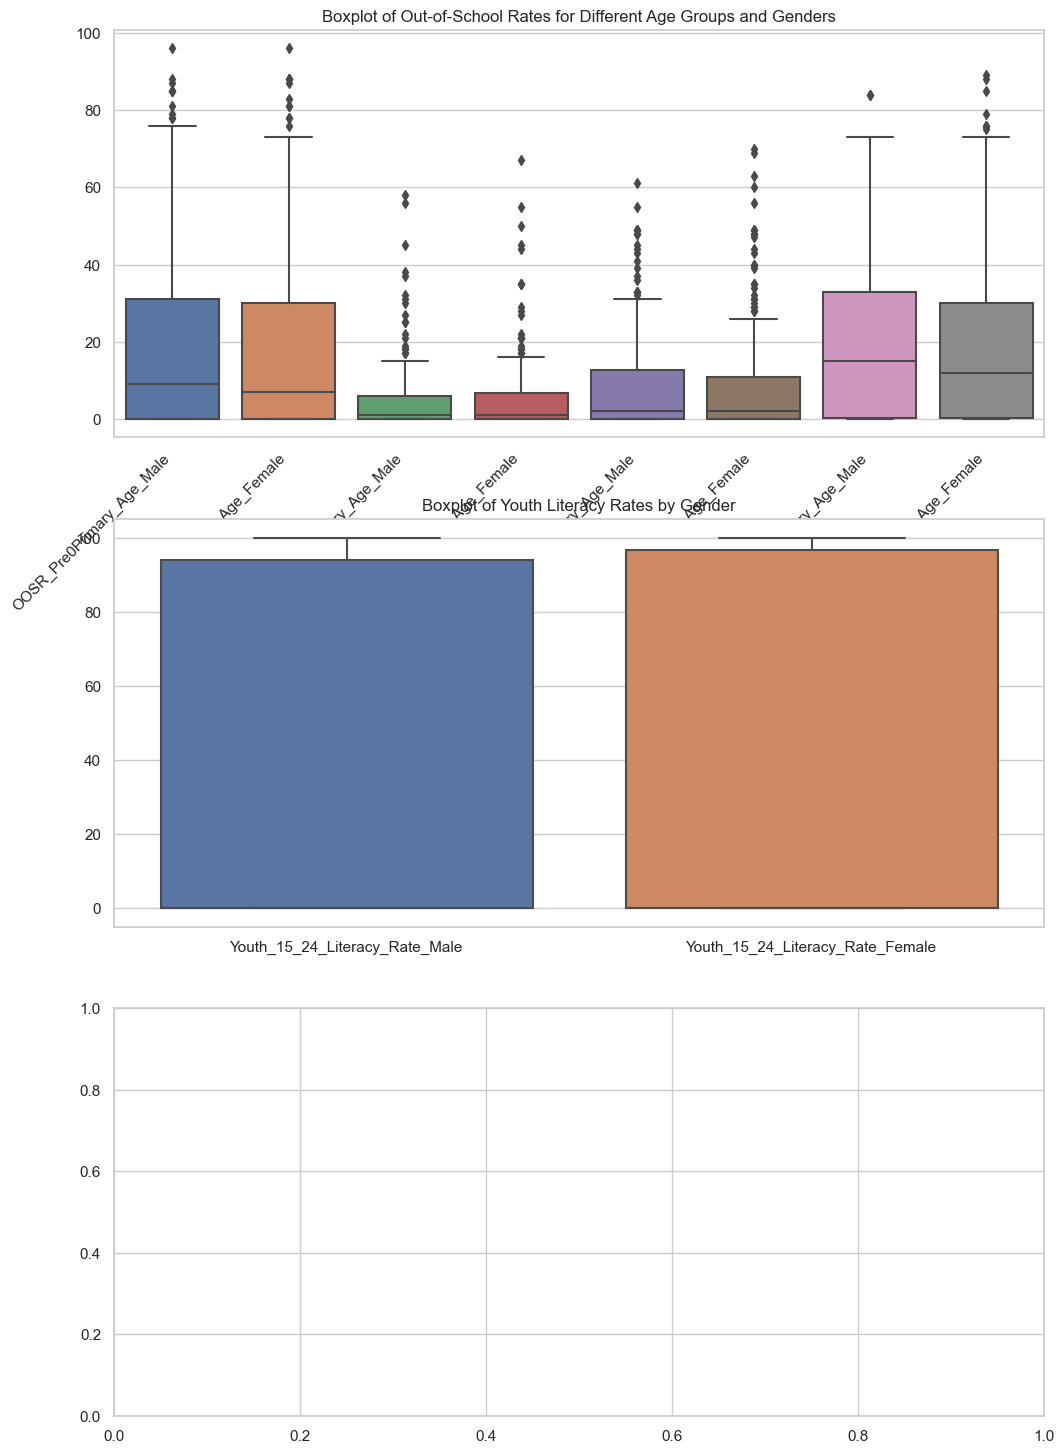

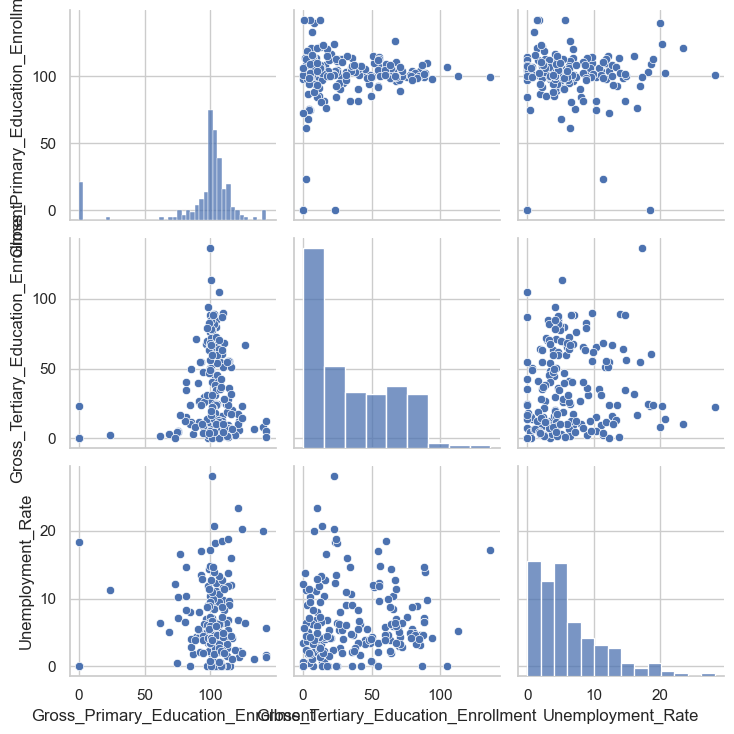

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Preparing data for visualization
oosr_columns = ['OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female', 
                'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female', 
                'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
                'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female']

literacy_columns = ['Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female']

enrollment_unemployment_columns = ['Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment', 'Unemployment_Rate']

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Plotting Out-of-School Rates
sns.boxplot(data=data[oosr_columns], ax=axes[0])
axes[0].set_title('Boxplot of Out-of-School Rates for Different Age Groups and Genders')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# Plotting Literacy Rates
sns.boxplot(data=data[literacy_columns], ax=axes[1])
axes[1].set_title('Boxplot of Youth Literacy Rates by Gender')

# Plotting Relationship between Education Enrollment and Unemployment Rates
sns.pairplot(data[enrollment_unemployment_columns])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [7]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Creating an imputer object to fill in the missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Including the imputer in the model pipeline
model = make_pipeline(imputer, LinearRegression())

# Fitting the model and making predictions as before
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with Imputation:", mse)


Mean Squared Error with Imputation: 37.0542705498185


In [8]:
import numpy as np

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 6.0872219073908


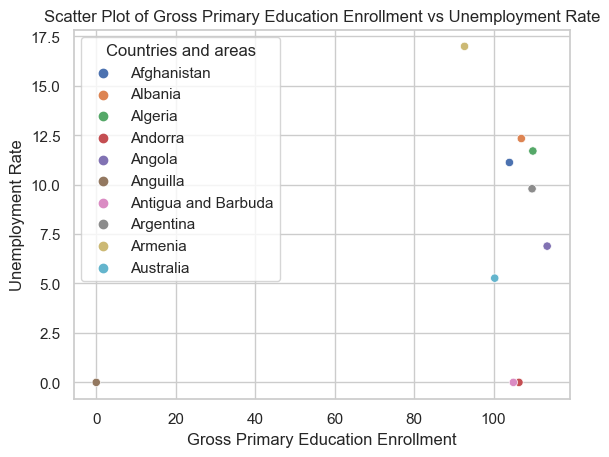

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Scatter plot of 'Gross_Primary_Education_Enrollment' vs 'Unemployment_Rate'
# Using 'Countries and areas' as categories (limited to first 10 countries for clarity)
subset_data = data.head(10)

# Using seaborn to create a colored scatter plot
sns.scatterplot(data=subset_data, x='Gross_Primary_Education_Enrollment', y='Unemployment_Rate', hue='Countries and areas')

# Adding titles and labels
plt.title('Scatter Plot of Gross Primary Education Enrollment vs Unemployment Rate')
plt.xlabel('Gross Primary Education Enrollment')
plt.ylabel('Unemployment Rate')

# Show plot
plt.show()


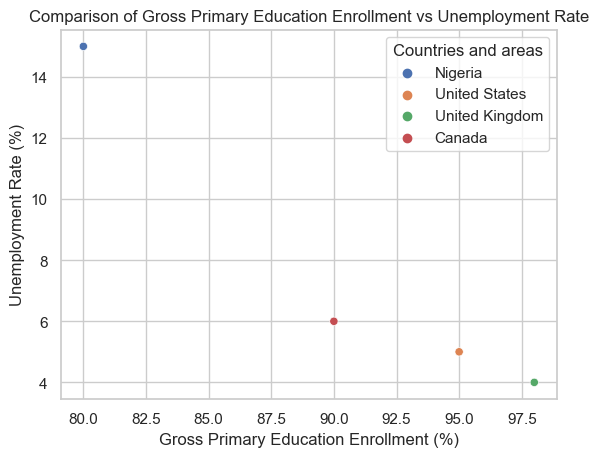

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Since the code execution state was reset, we need to reload the data
# For demonstration, I'll create a sample data frame mimicking the structure
sample_data = {
    'Countries and areas': ['Nigeria', 'United States', 'United Kingdom', 'Canada'],
    'Gross_Primary_Education_Enrollment': [80, 95, 98, 90],  # Example values
    'Unemployment_Rate': [15, 5, 4, 6]  # Example values
}
data = pd.DataFrame(sample_data)

# Filtering the dataset for Nigeria, USA, UK, and Canada
countries_to_compare = ['Nigeria', 'United States', 'United Kingdom', 'Canada']
filtered_data = data[data['Countries and areas'].isin(countries_to_compare)]

# Using seaborn to create a colored scatter plot
sns.scatterplot(data=filtered_data, x='Gross_Primary_Education_Enrollment', y='Unemployment_Rate', hue='Countries and areas')

# Adding titles and labels
plt.title('Comparison of Gross Primary Education Enrollment vs Unemployment Rate')
plt.xlabel('Gross Primary Education Enrollment (%)')
plt.ylabel('Unemployment Rate (%)')

# Show plot
plt.show()
